In [4]:
# Author(s): Haley Botteron
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
from pylab import plot, ylim, xlim, show, xlabel, ylabel, grid
from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_fraction = 0.3
import numpy as np
from scipy.optimize import curve_fit

In [14]:
def scaled_plot_first_blink(name, fit='sqrt',debug=True):
    filename1 =  name + 'Ratings.txt'
    with open (filename1, 'rb') as datafile:
        ratings = np.genfromtxt(datafile, delimiter = '\t', names=True,dtype=None)
        filename2 = "FirstBlinks" +name + '.txt'
        with open (filename2, 'rb') as datafile:
            firstBlink = np.genfromtxt(datafile, delimiter = '\t')
            filename3 = "zscore" +name + '.txt'
            with open (filename3, 'rb') as datafile:
                zscore = np.genfromtxt(datafile, delimiter = ',')
            
            
    ## TRIAL 1 #
    totalDiscomfort = []
    totalTime = []
    time1=[]
    discomfort1= []  
    for i in range (len(ratings['time'])):
        if  np.isnan(firstBlink[0])== True:
            if (ratings['block'][i] == "Don't blink" and ratings['time'][i]<65):
                time1.append(ratings['time'][i])
                discomfort1.append(zscore[i][1])
        elif (ratings['time'][i] < firstBlink[0]):
            time1.append(ratings['time'][i])
            discomfort1.append(zscore[i][1])   
    totalDiscomfort = totalDiscomfort + discomfort1
    totalTime = totalTime + time1    
 
    
    ## TRIAL 2 #
    time2=[]
    discomfort2= []
    for i in range (len(ratings['time'])):
        if (ratings['time'][i]> 88 and ratings['time'][i] < 160 and ratings['block'][i] == "Don't blink"):
            start2 = ratings['time'][i]
            break
    for i in range (len(ratings['time'])):
        if  np.isnan(firstBlink[1])== True:
            if (ratings['time'][i]> 88 and ratings['time'][i] < 160 and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]- start2
                time2.append(time)
                discomfort2.append(zscore[i][1])     
        elif (ratings['time'][i] < firstBlink[1]):
            if (ratings['time'][i]> 88 and ratings['time'][i] < firstBlink[1] and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start2
                time2.append(time)
                discomfort2.append(zscore[i][1])  
    totalDiscomfort = totalDiscomfort + discomfort2
    totalTime = totalTime + time2 
    
    ## TRIAL 3#
    time3=[]
    discomfort3= []
    for i in range (len(ratings['time'])):
        if (ratings['time'][i]> 178 and ratings['time'][i] < 250 and ratings['block'][i] == "Don't blink"):
            start3 = ratings['time'][i]
            break
    for i in range (len(ratings['time'])):
        if np.isnan(firstBlink[2])==True:
            if (ratings['time'][i]> 178 and ratings['time'][i] < 250 and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start3
                time3.append(time)
                discomfort3.append(zscore[i][1])
        elif (ratings['time'][i] < firstBlink[2]):
            if (ratings['time'][i]> 178 and ratings['time'][i] < firstBlink[2] and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start3
                time3.append(time)
                discomfort3.append(zscore[i][1])  
    totalDiscomfort = totalDiscomfort + discomfort3
    totalTime = totalTime + time3  
    
    ## TRIAL 4#
    time4=[]
    discomfort4= []
    for i in range (len(ratings['time'])):
        if (ratings['time'][i]> 268 and ratings['time'][i] < 340 and ratings['block'][i] == "Don't blink"):
            start4 = ratings['time'][i]
            break
    for i in range (len(ratings['time'])):
        if np.isnan(firstBlink[3])==True:
            if (ratings['time'][i]> 268 and ratings['time'][i] < 340 and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start4
                time4.append(time)
                discomfort4.append(zscore[i][1])  
        elif (ratings['time'][i] < firstBlink[3]):
            if (ratings['time'][i]> 268 and ratings['time'][i] < firstBlink[3] and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start4
                time4.append(time)
                discomfort4.append(zscore[i][1]) 
    totalDiscomfort = totalDiscomfort + discomfort4
    totalTime = totalTime + time4
  
    ## TRIAL 5#
    time5=[]
    discomfort5= []
    for i in range (len(ratings['time'])):
        if (ratings['time'][i]> 348 and ratings['time'][i] < 430 and ratings['block'][i] == "Don't blink"):
            start5 = ratings['time'][i]
            break
    for i in range (len(ratings['time'])):
        if np.isnan(firstBlink[4])==True:
            if (ratings['time'][i]> 348 and ratings['time'][i] < 430 and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start5
                time5.append(time)
                discomfort5.append(zscore[i][1])  
        elif (ratings['time'][i] < firstBlink[4]):
            if (ratings['time'][i]> 348 and ratings['time'][i] < firstBlink[4] and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start5
                time5.append(time)
                discomfort5.append(zscore[i][1]) 
    totalDiscomfort = totalDiscomfort + discomfort5
    totalTime = totalTime + time5

    def movingaverage(interval, window_size, fit='sqrt'):
        window= np.ones(int(window_size))/float(window_size)
        return np.convolve(interval, window, 'same')       
    points = zip(totalTime, totalDiscomfort)
    sorted(points)
    sorted_points = sorted(points)
    new_x = [point[0] for point in sorted_points]
    new_y = [point[1] for point in sorted_points] 
    
    if fit == 'sqrt':
        def sqrtfit(x, amplitude, baseline, c):
            return np.where(x<c, baseline*np.ones_like(x), amplitude*np.sqrt(x-c) + baseline)
        popt, pcov = curve_fit(sqrtfit,totalTime,totalDiscomfort , bounds=((0,-10,0),(20,10,30)))
        x1 = np.linspace(0, np.nanmax(new_x), len(new_x))
        y1 = sqrtfit(x1, *popt)
   
        print 'parameters: ' , popt
        print pcov

        #pylab.plot(x1,y1,"r",label='func fit Control', linewidth=3.0)
        y_av = movingaverage(new_y, 10, fit=fit)
        #plot(new_x, y_av, "g-" ) 
        #plot(new_x, new_y, ".", color = 'lightgray' )
        #y_av_lowess = lowess(y_av, new_x, frac=lowess_fraction, return_sorted=False) 
        #pylab.plot(new_x, y_av_lowess, label='lowess (fraction .3)', linewidth=3.0, color = 'k')
        
        #plt.legend(bbox_to_anchor=(1.05, .8), loc=2, borderaxespad=0.)
        #plt.title("Control Subjects' Discomfort Leading up to First Blink (Z-standardised)")
        #plt.xlabel('Time')
        #plt.ylabel('Discomfort (Z-standardised)')
        return totalTime, totalDiscomfort
    

In [15]:
def firstIndexGE(array, targetValue):
    for i in range (len(array)):
        if array[i] > targetValue:
            return i
def diff_scaled_inBetween(name, debug=False):
    filename1 = 'BlinkList' + name + '.txt'
    timeArrays=[]
    ySingle = []
    discomfortArrays=[]
    with open (filename1, 'rb') as datafile:
        blinks = np.genfromtxt(datafile, delimiter = '\t')
        filename3 =  name + 'Ratings.txt'
        with open (filename3, 'rb') as datafile:
            ratings = np.genfromtxt(datafile, delimiter = '\t', names=True,dtype=None)
            filename4 = 'zscore'+ name + '.txt'
            with open (filename4, 'rb') as datafile:
                zscore = np.genfromtxt(datafile, delimiter = ',', names=True,dtype=None)

            if debug:
                print('we got here')
            subTime, subDiscomfort = scaled_plot_first_blink(name)  
            def sqrtfit(x, amplitude, baseline, c):
                return np.where(x<c, baseline*np.ones_like(x), amplitude*np.sqrt(x-c) + baseline)
            popt, pcov = curve_fit(sqrtfit,subTime,subDiscomfort , bounds=((0,-10,0),(20,10,30)))
            with open (filename4, 'rb') as datafile:
                zscore = np.genfromtxt(datafile, delimiter = ',')
                for i in range (1, len(blinks)):
                    timeZero = blinks[i-1]
                    timeOne= blinks[i]
                # so we dont count blinks within the first 2 second of trial
                    if (timeZero< 2):
                        continue
                    if(timeZero>80 and timeZero<92):
                        continue
                    if (timeZero>170 and timeZero<182):
                        continue
                    if (timeZero>260 and timeZero<272):
                        continue
                    if (timeZero>350 and timeZero<362):
                        continue
                    if ((timeOne-timeZero) < 2):
                        continue
                    indexZero = firstIndexGE(ratings['time'],timeZero)
                    indexOne = firstIndexGE(ratings['time'],timeOne)
                    if np.all(ratings['block'][indexZero] == "Don't blink"):
                        if np.any(ratings['block'][indexOne] != "Don't blink"):
                            indexOne = indexZero
                            while (ratings['block'][indexOne] == "Don't blink"):
                                indexOne += 1
                            indexOne -= 1
                        discomfortI = []
                        timeI = []
                        yTrial = []
                        print name
                        for k in range (indexZero,indexOne):
                            discomfortI.append(zscore[k][1]- zscore[indexZero-1][1])
                            #print "k = %d, zscore[%d] = %f, zscore[indexZero-1] = %f" % ( k, k, zscore[k], zscore[indexZero-1])
                            timeI.append(ratings['time'][k]-timeZero)
                            ##Where Discomfort SHould Be according to Line
                            if ratings['time'][k] < 61:
                                predictedsingleY = (popt[0] *np.sqrt(ratings['time'][k]-popt[2])+popt[1])
                            if ratings['time'][k] < 151 and ratings['time'][k] >90 : 
                                predictedsingleY = (popt[0] *np.sqrt((ratings['time'][k]-90)-popt[2])+popt[1])
                            if ratings['time'][k] < 241 and ratings['time'][k] >180: 
                                predictedsingleY = (popt[0] *np.sqrt((ratings['time'][k]-180)-popt[2])+popt[1])
                            if ratings['time'][k] < 331 and ratings['time'][k] > 270:
                                predictedsingleY = (popt[0] *np.sqrt((ratings['time'][k]-270)-popt[2])+popt[1])
                            if ratings['time'][k] < 420 and ratings['time'][k] > 360:
                                predictedsingleY = (popt[0] *np.sqrt((ratings['time'][k]-360)-popt[2])+popt[1])  
                            if np.isnan(predictedsingleY) == True:
                                print "got here 1"
                                predictedsingleY = popt[1]*np.ones_like(k)
                            #print "k = %d, ratings['time'][%d] = %f" % (k, k, ratings['time'][k])
                            print "k= %d, ratings['time'][%d] = %f" %(k, k, ratings['time'][k]), popt[0], popt[1],popt[2]
                            print "k = %d, predictedsingleY = %f" % (k, predictedsingleY)
                            print "zscore =" ,zscore[k]
                            print 'indexZero-1 here =', ratings['time'][indexZero-1]
                            if ratings['time'][indexZero-1] < 61:
                                predictedBlinkPt = (popt[0] *np.sqrt(ratings['time'][indexZero-1]-popt[2])+popt[1])
                            if ratings['time'][indexZero-1] < 151 and ratings['time'][indexZero-1] >90 : 
                                predictedBlinkPt = (popt[0] *np.sqrt((ratings['time'][indexZero-1]-90)-popt[2])+popt[1])
                            if ratings['time'][indexZero-1] < 241 and ratings['time'][indexZero-1] >180: 
                                predictedBlinkPt = (popt[0] *np.sqrt((ratings['time'][indexZero-1]-180)-popt[2])+popt[1])
                            if ratings['time'][indexZero-1] < 331 and ratings['time'][indexZero-1] > 270:
                                predictedBlinkPt = (popt[0] *np.sqrt((ratings['time'][indexZero-1]-270)-popt[2])+popt[1])
                            if ratings['time'][indexZero-1] < 420 and ratings['time'][indexZero-1] > 360:
                                predictedBlinkPt = (popt[0] *np.sqrt((ratings['time'][indexZero-1]-360)-popt[2])+popt[1]) 
                            if np.isnan(predictedBlinkPt) == True:
                                print "got here 2"
                                predictedBlinkPt = popt[1]*np.ones_like([indexZero-1])
                            yVal = (zscore[k][1] - (predictedsingleY- predictedBlinkPt) - zscore[indexZero-1][1]) 
                            yTrial.append(yVal)
                            print "k = %d, predictedBlinkPt = %f" % (k, predictedBlinkPt)
                            print "k = %d, yVal = %f" % (k, yVal)
                        print 'end run'
                        discomfortArrays = discomfortArrays + discomfortI
                        timeArrays = timeArrays+ timeI
                        ySingle = ySingle + yTrial
                        
                    #print popt[0], popt [1], popt[2]
                    #plot(timeArrays, discomfortArrays, ".", color='lightblue' )
            return timeArrays, discomfortArrays , ySingle
        

In [16]:
diff_scaled_inBetween('TM103')
timeArrays, discomfortArrays, ySingle= diff_scaled_inBetween('TM103')
totalX = []
ytot = []
totalX = totalX + timeArrays
ytot = ytot + ySingle 
          
def movingaverage(interval, window_size):
        window= np.ones(int(window_size))/float(window_size)
        return np.convolve(interval, window, 'same')
print len(totalX), len(ytot)
points = zip(totalX, ytot)
#print "popt",popt
sorted(points)
sorted_points = sorted(points)
new_x = [point[0] for point in sorted_points]
new_y = [point[1] for point in sorted_points] 
y_av = movingaverage(new_y, 10)
plot(new_x, new_y, ".", color = 'lightgreen' )
#plot(new_x, y_av, "g-" )  
y_av_lowess = lowess(y_av, new_x, frac=lowess_fraction, return_sorted=False) 
    #pylab.plot(new_x, y_av_lowess, label='lowess (fraction .2)', linewidth=3.0, color= 'k')
    #plt.legend(bbox_to_anchor=(1.05, .8), loc=2, borderaxespad=0.)
    #plt.title("Tic Subjects' Change from Predicted Discomfort in Between Blinks")
    #plt.xlabel('Time')
    #plt.ylabel('Change from Predicted Discomfort')
    #plt.xlim(xmax=30)


parameters:  [ 10.          -0.24086239  15.        ]
[[ 0.          0.          0.        ]
 [ 0.          0.00427753  0.        ]
 [ 0.          0.          0.        ]]
TM103
got here 1
k= 43, ratings['time'][43] = 11.375000 10.0 -0.240862387634 15.0
k = 43, predictedsingleY = -0.240862
zscore = [ 11.375       -0.08218753]
indexZero-1 here = 11.109
got here 2
k = 43, predictedBlinkPt = -0.240862
k = 43, yVal = -0.042832
got here 1
k= 44, ratings['time'][44] = 11.640000 10.0 -0.240862387634 15.0
k = 44, predictedsingleY = -0.240862
zscore = [ 11.64        -0.30246482]
indexZero-1 here = 11.109
got here 2
k = 44, predictedBlinkPt = -0.240862
k = 44, yVal = -0.263109
got here 1
k= 45, ratings['time'][45] = 11.906000 10.0 -0.240862387634 15.0
k = 45, predictedsingleY = -0.240862
zscore = [ 11.906       -0.34529651]
indexZero-1 here = 11.109
got here 2
k = 45, predictedBlinkPt = -0.240862
k = 45, yVal = -0.305941
got here 1
k= 46, ratings['time'][46] = 12.171000 10.0 -0.240862387634 15.0

NameError: name 'popt' is not defined

parameters:  [ 0.5486414  -1.17948336  6.99559719]
[[ 0.00017821 -0.00018229  0.00057024]
 [-0.00018229  0.00060978  0.00125395]
 [ 0.00057024  0.00125395  0.02153036]]
TM101
k= 60, ratings['time'][60] = 15.875000 0.548641404651 -1.17948335562 6.99559718723
k = 60, predictedsingleY = 0.455376
zscore = [ 15.875        0.74506782]
indexZero-1 here = 15.61
k = 60, predictedBlinkPt = 0.430796
k = 60, yVal = -0.012215
k= 61, ratings['time'][61] = 16.141000 0.548641404651 -1.17948335562 6.99559718723
k = 61, predictedsingleY = 0.479683
zscore = [ 16.141        0.75743265]
indexZero-1 here = 15.61
k = 61, predictedBlinkPt = 0.430796
k = 61, yVal = -0.024157
k= 62, ratings['time'][62] = 16.406000 0.548641404651 -1.17948335562 6.99559718723
k = 62, predictedsingleY = 0.503550
zscore = [ 16.406        0.67912081]
indexZero-1 here = 15.61
k = 62, predictedBlinkPt = 0.430796
k = 62, yVal = -0.126336
k= 63, ratings['time'][63] = 16.672000 0.548641404651 -1.17948335562 6.99559718723
k = 63, predicte

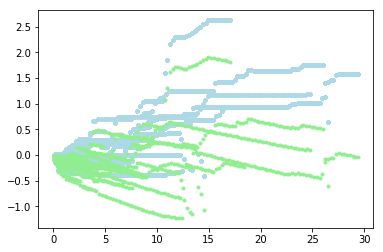

In [43]:
diff_scaled_inBetween('TM101')
timeArrays, discomfortArrays, ySingle= diff_scaled_inBetween('TM101')
totalX = []
ytot = []
totalX = totalX + timeArrays
ytot = ytot + ySingle 
          
def movingaverage(interval, window_size):
        window= np.ones(int(window_size))/float(window_size)
        return np.convolve(interval, window, 'same')
print len(totalX), len(ytot)
points = zip(totalX, ytot)
print "popt",popt
sorted(points)
sorted_points = sorted(points)
new_x = [point[0] for point in sorted_points]
new_y = [point[1] for point in sorted_points] 
y_av = movingaverage(new_y, 10)
plot(new_x, new_y, ".", color = 'lightgreen' )
#plot(new_x, y_av, "g-" )  
y_av_lowess = lowess(y_av, new_x, frac=lowess_fraction, return_sorted=False) 
    #pylab.plot(new_x, y_av_lowess, label='lowess (fraction .2)', linewidth=3.0, color= 'k')
    #plt.legend(bbox_to_anchor=(1.05, .8), loc=2, borderaxespad=0.)
    #plt.title("Tic Subjects' Change from Predicted Discomfort in Between Blinks")
    #plt.xlabel('Time')
    #plt.ylabel('Change from Predicted Discomfort')
    #plt.xlim(xmax=30)

parameters:  [ 10.          -0.85337295  15.        ]
[[ 0.          0.          0.        ]
 [ 0.          0.00388712  0.        ]
 [ 0.          0.          0.        ]]
TM202
got here 1
k= 38, ratings['time'][38] = 10.078000 10.0 -0.853372946496 15.0
k = 38, predictedsingleY = -0.853373
zscore = [ 10.078       -0.73344323]
indexZero-1 here = 9.813
got here 2
k = 38, predictedBlinkPt = -0.853373
k = 38, yVal = 0.000000
got here 1
k= 39, ratings['time'][39] = 10.344000 10.0 -0.853372946496 15.0
k = 39, predictedsingleY = -0.853373
zscore = [ 10.344       -0.73344323]
indexZero-1 here = 9.813
got here 2
k = 39, predictedBlinkPt = -0.853373
k = 39, yVal = 0.000000
got here 1
k= 40, ratings['time'][40] = 10.609000 10.0 -0.853372946496 15.0
k = 40, predictedsingleY = -0.853373
zscore = [ 10.609       -0.73344323]
indexZero-1 here = 9.813
got here 2
k = 40, predictedBlinkPt = -0.853373
k = 40, yVal = 0.000000
got here 1
k= 41, ratings['time'][41] = 10.875000 10.0 -0.853372946496 15.0
k = 4

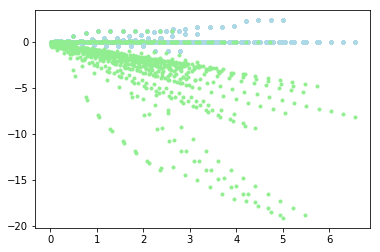

In [51]:
diff_scaled_inBetween('TM202')
timeArrays, discomfortArrays, ySingle= diff_scaled_inBetween('TM202')
totalX = []
ytot = []
totalX = totalX + timeArrays
ytot = ytot + ySingle 
          
def movingaverage(interval, window_size):
        window= np.ones(int(window_size))/float(window_size)
        return np.convolve(interval, window, 'same')
print len(totalX), len(ytot)
points = zip(totalX, ytot)
print "popt",popt
sorted(points)
sorted_points = sorted(points)
new_x = [point[0] for point in sorted_points]
new_y = [point[1] for point in sorted_points] 
y_av = movingaverage(new_y, 10)
plot(new_x, new_y, ".", color = 'lightgreen' )
#plot(new_x, y_av, "g-" )  
y_av_lowess = lowess(y_av, new_x, frac=lowess_fraction, return_sorted=False) 
    #pylab.plot(new_x, y_av_lowess, label='lowess (fraction .2)', linewidth=3.0, color= 'k')
    #plt.legend(bbox_to_anchor=(1.05, .8), loc=2, borderaxespad=0.)
    #plt.title("Tic Subjects' Change from Predicted Discomfort in Between Blinks")
    #plt.xlabel('Time')
    #plt.ylabel('Change from Predicted Discomfort')
    #plt.xlim(xmax=30)

In [26]:
def control_predicted_discomfort(numsub):
    totalX=[]
    ytot = []
    
    for i in range (0,numsub):
        if i <9:
            if i==1:
                continue
            if  i==8:
                continue
            if i==4:
                continue
            else:
                name = 'TM20' +str(i+1)
        if i ==12:
            continue
        if i ==14:
            continue
        if i>=9:
            name = 'TM2'+ str(i+1)
            
        timeArrays, discomfortArrays, ySingle = diff_scaled_inBetween(name)      
        totalX = totalX + timeArrays
        ytot = ytot + ySingle 
          
    def movingaverage(interval, window_size):
            window= np.ones(int(window_size))/float(window_size)
            return np.convolve(interval, window, 'same')
    points = zip(totalX, ytot)
    sorted(points)
    sorted_points = sorted(points)
    new_x = [point[0] for point in sorted_points]
    new_y = [point[1] for point in sorted_points] 
    y_av = movingaverage(new_y, 10)
    plot(new_x, new_y, ".", color = 'lightblue' )
    #plot(new_x, y_av, "g-" )  
    y_av_lowess = lowess(y_av, new_x, frac=lowess_fraction, return_sorted=False) 
    #pylab.plot(new_x, y_av_lowess, label='lowess (fraction .2)', linewidth=3.0, color= 'k')
    #plt.legend(bbox_to_anchor=(1.05, .8), loc=2, borderaxespad=0.)
    #plt.title("Control Subjects' Change from Predicted Discomfort in Between Blinks")
    #plt.xlabel('Time')
    #plt.ylabel('Change from Predicted Discomfort')
    #plt.xlim(xmax=30)
    return new_x, new_y
 

In [30]:
def tic_predicted_discomfort(numsub):
    totalX=[]
    ytot = []
    
    for i in range (0,numsub):
        if i <9:
            name = 'TM10' + str(i+1)
            if i ==2:
                continue      
        elif i==9:
            continue
        elif i>=10 and i<12:
            name = 'TM1'+ str(i+1)
        elif i==13:
            name = 'TM205'
        elif i==14:
            name = 'TM1'+ str(i+1)
            
        elif i<17 and i>14:
            name = 'TM1'+ str(i+1)
            
        timeArrays, discomfortArrays, ySingle = diff_scaled_inBetween(name)
        totalX = totalX + timeArrays
        ytot = ytot + ySingle 
          
    def movingaverage(interval, window_size):
            window= np.ones(int(window_size))/float(window_size)
            return np.convolve(interval, window, 'same')
    print len(totalX), len(ytot)
    points = zip(totalX, ytot)
  
    sorted(points)
    sorted_points = sorted(points)
    new_x = [point[0] for point in sorted_points]
    new_y = [point[1] for point in sorted_points] 
    y_av = movingaverage(new_y, 10)
    plot(new_x, new_y, ".", color = 'lightblue' )
    #plot(new_x, y_av, "g-" )  
    y_av_lowess = lowess(y_av, new_x, frac=lowess_fraction, return_sorted=False) 
    #pylab.plot(new_x, y_av_lowess, label='lowess (fraction .2)', linewidth=3.0, color= 'k')
    #plt.legend(bbox_to_anchor=(1.05, .8), loc=2, borderaxespad=0.)
    #plt.title("Tic Subjects' Change from Predicted Discomfort in Between Blinks")
    #plt.xlabel('Time')
    #plt.ylabel('Change from Predicted Discomfort')
    #plt.xlim(xmax=30)
    return new_x, new_y
 
    

In [20]:
def tic_avgSD(numsub):
    import matplotlib.pyplot as plt
    from scipy.interpolate import UnivariateSpline
    new_x, new_y =tic_predicted_discomfort(numsub)
    avgX = []
    avgY = []
    SDpos = []
    SDneg= []
    print len(new_x)
    print(new_x[:60])
    print(new_y[:60])
    spl = UnivariateSpline(new_x, new_y)
    xs = np.linspace(.1250, 450.1250, 1800)
    spl.set_smoothing_factor(0.1)
        
    for i in range(0,30):
        block1 = []
        block2 = []
        block3 = []
        block4 = []
        timeblock1 = []
        timeblock2 = []
        timeblock3 = []
        timeblock4 = []
        for m in range (len(new_x)):
            if new_x[m] < i+.25 and new_x[m]>=i:
                block1.append(new_y[m])
                timeblock1.append(new_x[m])
            if new_x[m] < i+.5 and new_x[m]>=i+.25:
                block2.append(new_y[m])
                timeblock2.append(new_x[m])
            if new_x[m] >= i+.5 and new_x[m]< i+.75:
                block3.append(new_y[m])
                timeblock3.append(new_x[m])
            if new_x[m] >= i+.75 and new_x[m]< i+1:
                block4.append(new_y[m])
                timeblock4.append(new_x[m])
            
        avgY.append(np.average(block1))
        avgY.append(np.average(block2))
        avgY.append(np.average(block3))
        avgY.append(np.average(block4))
        avgX.append(np.average(timeblock1))
        avgX.append(np.average(timeblock2))
        avgX.append(np.average(timeblock3))
        avgX.append(np.average(timeblock4))
        SDpos.append(np.std(block1) +np.average(block1))
        SDpos.append(np.std(block2) +np.average(block2))
        SDpos.append(np.std(block3) +np.average(block3))
        SDpos.append(np.std(block4) +np.average(block4))
        SDneg.append(-np.std(block1) +np.average(block1))
        SDneg.append(-np.std(block2)+np.average(block2))
        SDneg.append(-np.std(block3)+np.average(block3))
        SDneg.append(-np.std(block4)+np.average(block4))
    for n in range (len(avgX)):
        if avgY[n]>= 0:
            print "y is zero here"
            print avgX[n]
            break
    
    
    print len(new_y)
    print len(avgX)
    #print avgX
    #print avgY
    print len(SDpos)
    print len(SDneg)
    print np.amax(avgY)
    plot(new_x, new_y, '.', color = 'lightgray', label = 'Data')
    
    plot(avgX, SDpos, 'k-', label = 'Standard Deviation')
    plot(avgX, SDneg, 'k-')
    plot(avgX, avgY, 'g-', label = 'Average')
    plt.xlim(xmax=30)
    plt.legend(bbox_to_anchor=(1.05, .8), loc=2, borderaxespad=0.)
    plt.title("A) Tic Subjects")
    plt.xlabel('Time')
    plt.ylabel('Change from Predicted Discomfort')
    plt.ylim((-3.5,2.5))
    

parameters:  [ 0.5486414  -1.17948336  6.99559719]
[[ 0.00017821 -0.00018229  0.00057024]
 [-0.00018229  0.00060978  0.00125395]
 [ 0.00057024  0.00125395  0.02153036]]
TM101
k= 60, ratings['time'][60] = 15.875000 0.548641404651 -1.17948335562 6.99559718723
k = 60, predictedsingleY = 0.455376
zscore = [ 15.875        0.74506782]
indexZero-1 here = 15.61
k = 60, predictedBlinkPt = 0.430796
k = 60, yVal = -0.012215
k= 61, ratings['time'][61] = 16.141000 0.548641404651 -1.17948335562 6.99559718723
k = 61, predictedsingleY = 0.479683
zscore = [ 16.141        0.75743265]
indexZero-1 here = 15.61
k = 61, predictedBlinkPt = 0.430796
k = 61, yVal = -0.024157
k= 62, ratings['time'][62] = 16.406000 0.548641404651 -1.17948335562 6.99559718723
k = 62, predictedsingleY = 0.503550
zscore = [ 16.406        0.67912081]
indexZero-1 here = 15.61
k = 62, predictedBlinkPt = 0.430796
k = 62, yVal = -0.126336
k= 63, ratings['time'][63] = 16.672000 0.548641404651 -1.17948335562 6.99559718723
k = 63, predicte

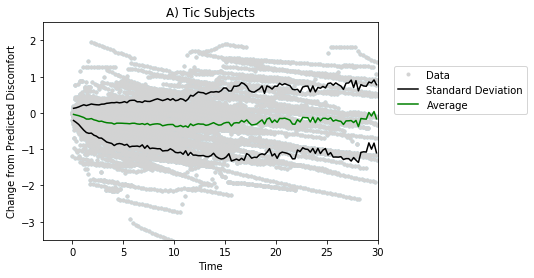

In [36]:
tic_avgSD(18) #left out one subject

In [34]:
def control_avgSD(numsub):
    new_x, new_y =control_predicted_discomfort(numsub)
    avgX = []
    avgY = []
    SDpos = []
    SDneg= []
    print len(new_x)
    print(new_x[:60])
    print(new_y[:60])
    
    for i in range(0,30):
        block1 = []
        block2 = []
        block3 = []
        block4 = []
        timeblock1 = []
        timeblock2 = []
        timeblock3 = []
        timeblock4 = []
        for m in range (len(new_x)):
            if new_x[m] < i+.25 and new_x[m]>=i:
                block1.append(new_y[m])
                timeblock1.append(new_x[m])
            if new_x[m] < i+.5 and new_x[m]>=i+.25:
                block2.append(new_y[m])
                timeblock2.append(new_x[m])
            if new_x[m] >= i+.5 and new_x[m]< i+.75:
                block3.append(new_y[m])
                timeblock3.append(new_x[m])
            if new_x[m] >= i+.75 and new_x[m]< i+1:
                block4.append(new_y[m])
                timeblock4.append(new_x[m])
            
        avgY.append(np.average(block1))
        avgY.append(np.average(block2))
        avgY.append(np.average(block3))
        avgY.append(np.average(block4))
        avgX.append(np.average(timeblock1))
        avgX.append(np.average(timeblock2))
        avgX.append(np.average(timeblock3))
        avgX.append(np.average(timeblock4))
        SDpos.append(np.std(block1) +np.average(block1))
        SDpos.append(np.std(block2) +np.average(block2))
        SDpos.append(np.std(block3) +np.average(block3))
        SDpos.append(np.std(block4) +np.average(block4))
        SDneg.append(-np.std(block1) +np.average(block1))
        SDneg.append(-np.std(block2)+np.average(block2))
        SDneg.append(-np.std(block3)+np.average(block3))
        SDneg.append(-np.std(block4)+np.average(block4))
    for n in range (len(avgX)):
        if avgY[n]>=0:
            print "y is zero here"
            print avgX[n]
    print "max here"
    print np.amax(avgY)
    #print avgX
    #print avgY
    
    plot(new_x, new_y, '.', color = 'lightgray', label = 'Data')
    plot(avgX, SDpos, 'k', label = 'Standard Deviation')
    plot(avgX, SDneg, 'k')
    plot(avgX, avgY, 'g-', label = 'Average')
    plt.xlim(xmax=30)
    plt.legend(bbox_to_anchor=(1.05, .8), loc=2, borderaxespad=0.)
    plt.title("B) Control Subjects")
    plt.xlabel('Time')
    plt.ylabel('Change from Predicted Discomfort')
    plt.ylim((-3.5,2.5))
    

parameters:  [  0.37377427  -1.03896752  17.63317671]
[[  1.30826329e-05  -3.39051981e-05   1.00644125e-04]
 [ -3.39051981e-05   2.05116794e-04   9.23198726e-04]
 [  1.00644125e-04   9.23198726e-04   3.28091882e-02]]
TM201
got here 1
k= 1417, ratings['time'][1417] = 375.703000 0.373774268592 -1.03896751516 17.6331767094
k = 1417, predictedsingleY = -1.038968
zscore = [  3.75703000e+02  -1.07261699e-03]
indexZero-1 here = 375.438
got here 2
k = 1417, predictedBlinkPt = -1.038968
k = 1417, yVal = 0.033433
got here 1
k= 1418, ratings['time'][1418] = 375.969000 0.373774268592 -1.03896751516 17.6331767094
k = 1418, predictedsingleY = -1.038968
zscore = [  3.75969000e+02  -1.07261699e-03]
indexZero-1 here = 375.438
got here 2
k = 1418, predictedBlinkPt = -1.038968
k = 1418, yVal = 0.033433
got here 1
k= 1419, ratings['time'][1419] = 376.235000 0.373774268592 -1.03896751516 17.6331767094
k = 1419, predictedsingleY = -1.038968
zscore = [  3.76235000e+02   2.49309968e-02]
indexZero-1 here = 375

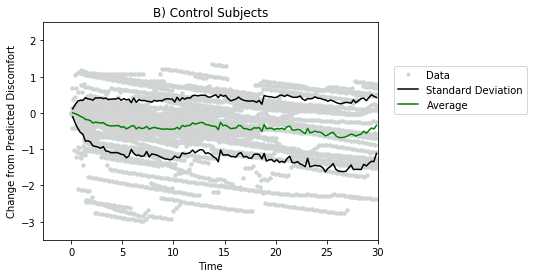

In [37]:
control_avgSD(18) ##left out one subject